# Homework 2 - eCommerce Analytics

![alt text](img/Sap_Kag_Pyt2.png "")

##### **Author:** Daniel Jiménez & Guillaume Teissier
##### **Date:** 2020/11/08
##### **Subject:** Algorithmic Methods of Data Mining
##### **Data Science Master's programme**
##### **La Sapienza University of Rome**
_____

In this challenge were encouraged to perform an Exploratory Data Analysis (EDA) about the behaviour data for 7 months (from October 2019 to April 2020) from a large multi-category online store. If you want to check the data used click on [THIS](https://www.kaggle.com/mkechinov/ecommerce-behavior-data-from-multi-category-store?select=2019-Oct.csv) link.

In the following cells, you can find the solution an explanation about many core questions to understand the behaviour of the transactions in an eCommerce platform.

## Setting work environment up

As like in any data-driven situation, it's important to keep clean and tidy the work environment. We achieve this by explaining step-by-step the process we followed to load the information, and at a glance, understand its structure and main aspects. 

**Note:** Along with this notebook you can find the function gc.collect(), which we use to help Python to release some RAM.

First, we set the libraries that we will be using to perform all the analysis. 

In [26]:
# If any of the libraries is not installed,
# !pip install pandas
# !pip install numpy
# !pip install missingno
# !pip install  plotly
# !pip install  plotly_express

In [27]:
# Import libraries
import pandas as pd
import numpy as np
import time
import missingno as msno 
import gc
import plotly.express as px

Afwerwards, we proceed to load all the required datasets.

In [6]:
# Load each CSV file
start_time = time.time()
df1 = pd.read_csv("data/2019-Oct.csv", parse_dates = ['event_time'], date_parser = pd.to_datetime)
gc.collect()
df = pd.read_csv("data/2019-Nov.csv", parse_dates = ['event_time'], date_parser = pd.to_datetime)
print("--- %s seconds ---" % (time.time() - start_time))

--- 1321.8635740280151 seconds ---


The data we loaded now needs to be appended into one single table to facilitate the analysis. 

In [7]:
gc.collect()
df = df1.append(df)
del df1

Finally, we save the data in a pickle file to load it faster if we have to close the session in Jupyter. It is faster than loading each CSV file.

In [8]:
gc.collect()
df.to_pickle("data/ecomm_oct19_nov_19")

In [2]:
start_time = time.time()
df = pd.read_pickle("data/ecomm_oct19_nov_19")
print("--- %s seconds ---" % (time.time() - start_time))

--- 73.2611472606659 seconds ---


Once our data is combined in an analyzable shape, we proceed to obtain some initial summary statistics over the numerical columns of our dataset grouped by each one of the years.

In [27]:
start_time = time.time()
# Statistics by group
gc.collect()
print(df[['event_time' , 'product_id', 'category_id', 'price', 'user_id']].describe(include = 'all', datetime_is_numeric = True))
print("--- %s seconds ---" % (time.time() - start_time))

                                event_time    product_id   category_id  \
count                            109950743  1.099507e+08  1.099507e+08   
mean   2019-11-04 05:59:54.001139456+00:00  1.175577e+07  2.057707e+18   
min              2019-10-01 00:00:00+00:00  1.000365e+06  2.053014e+18   
25%              2019-10-20 16:33:43+00:00  1.005256e+06  2.053014e+18   
50%              2019-11-08 12:25:33+00:00  5.100396e+06  2.053014e+18   
75%              2019-11-17 05:23:34+00:00  1.720051e+07  2.053014e+18   
max              2019-11-30 23:59:59+00:00  1.000286e+08  2.187708e+18   
std                                    NaN  1.543564e+07  1.949326e+16   

              price       user_id  
count  1.099507e+08  1.099507e+08  
mean   2.916348e+02  5.366698e+08  
min    0.000000e+00  1.030022e+07  
25%    6.796000e+01  5.162629e+08  
50%    1.649300e+02  5.326415e+08  
75%    3.601100e+02  5.563312e+08  
max    2.574070e+03  5.799699e+08  
std    3.566800e+02  2.145173e+07  
--- 37.70

From the previous information, we can extract that:
    
- The dates of the events go from 11th October 2019 to 30th November 2019
- Product prices vary from 0 to 2574.07. Besides, the mean price is 291.63. Finally, the prices vary, on average, 356.68 from the mean value.
- The other variables, although are numerical, the interpretation of their mean, deviation or quartiles does not make much sense to be interpreted. It's because they are nominal values.

Now, we check some initial frequences on the non-numerical variables:

In [37]:
print("Frequences for event_type:\n", df.event_type.value_counts(), "\n")
print("Frequences for category_code:\n", df.category_code.value_counts(), "\n")
print("Frequences for brand:\n", df.brand.value_counts(), "\n")
print("Frequences for user_session:\n", df.user_session.value_counts())
print("Frequences for user_session:\n", df.event_time.dt.to_period('M').value_counts())

Frequences for event_type:
 view        104335509
cart          3955446
purchase      1659788
Name: event_type, dtype: int64 

Frequences for category_code:
 electronics.smartphone          27882231
electronics.clocks               3397999
electronics.video.tv             3321796
computers.notebook               3318177
electronics.audio.headphone      2917065
                                  ...   
apparel.shorts                      1284
apparel.jacket                       437
country_yard.furniture.bench         192
construction.tools.screw             184
appliances.kitchen.fryer             108
Name: category_code, Length: 129, dtype: int64 

Frequences for brand:
 samsung         13172020
apple           10381933
xiaomi           7721825
huawei           2521331
lucente          1840936
                  ...   
helpfer                1
grifon                 1
portdesigns            1
vigoole                1
build-a-bear           1
Name: brand, Length: 4302, dtype: int64 

Fr

C:\Users\Daniel_Jimenez\anaconda3\envs\ADM\lib\site-packages\pandas\core\arrays\datetimes.py:1091: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


Frequences for user_session:
 2019-11    67501979
2019-10    42448764
Freq: M, Name: event_time, dtype: int64


From above we conclude that:
- There are only three categories for event_type (view, cart, purchase). The category that appears the most is view.
- category_code has 5 categories which the most common is electronics.smartphone and the least common is appliances.kitchen.fryer
- The brand that appears the most is samsung and there are plenty of different brands
- The user session d99d91bf-40f8-4e29-9593-54b4a1826542 appeared 4128, meaning that this is the usser session with the most number of events
- There are 67'501,979 events from 2019-11 and 42'448,764 events from 2019-10.

It is important to clarify that the previous results are just a general overview of the dataset. If we want to get more accurate information, we should take the measures by event_type. Later you can find more insights on that.

As a relevant activity, it's always important to check how much missing data we are dealing with. We do it by creating a barplot of the missing values per attribute.

<AxesSubplot:>

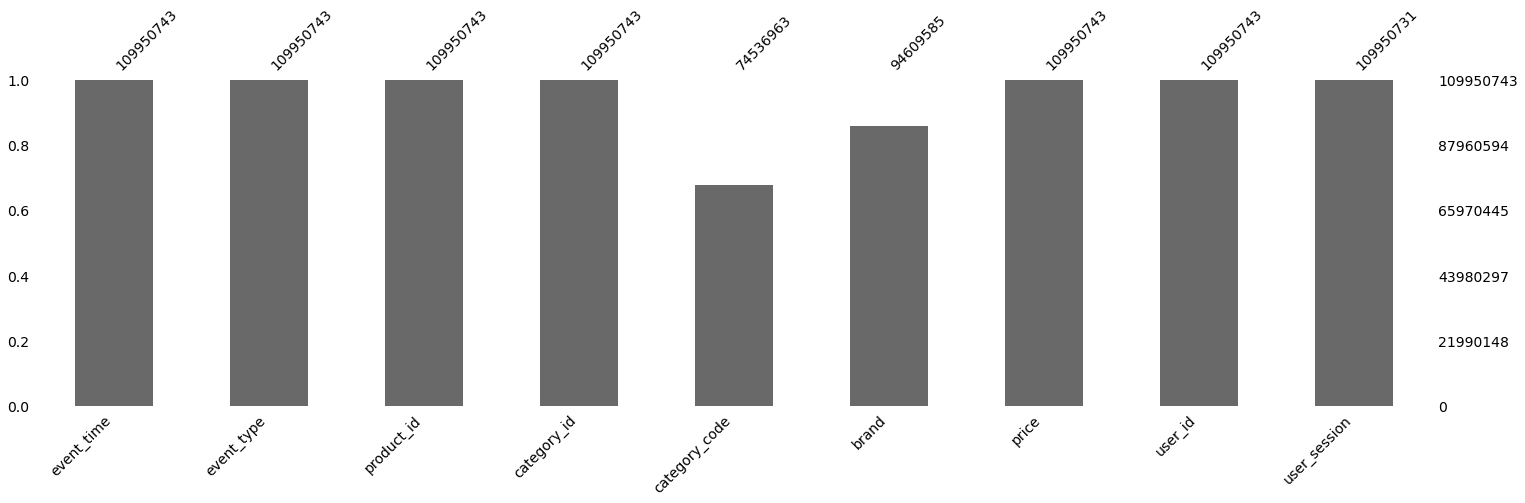

In [32]:
msno.bar(df, labels=True, figsize=(25,6), fontsize=14)

The previous chart shows the number of non-missing values in each of the variables. As we can see, most of the variables are complete, except for category_code and brand. Those variables have 32.2% and 13.9% of missing values.

Now that we have proved that the data seems consistent, we can start answering the questions proposed.

In [3]:
# Define temporary df to work with less rows while creating querys
small_df = df[0:1000000]

## [RQ1] Which is the rate of complete funnels?

To get the rate of complete funnels, we take an aggregation by user_session and event_type to obtain unique combinations of those keys. Afterwards, we perform a new aggregation but now only by user_session. With the latter, we get all the funnels that occur by user session (let's call it n). Using the previous step, we count how many of the funnels were completed. Those are the sessions with 3 occurrences in the previous aggregation (let's call it N). As a final step, we calculate the ratio between n over N.

It's important to recall that we decided to use the aggregation by user_session since it provides the information of all the events, even across the same user_id (one user_id can have multiple sessions).

In [96]:
# Get unique combination per session and event_type
all_funn = pd.DataFrame(df.groupby(['user_session', 'event_type']).event_type.count()).rename(columns={'event_type':'count'}).reset_index()
gc.collect()

# Count the funnels combination per session
all_funn = pd.DataFrame(all_funn.groupby(['user_session']).user_session.count()).rename(columns={'user_session':'count'}).reset_index()
N = int(all_funn.shape[0])

# Get all the funnels combination per session that had three steps (view, chert, purchase)
n = all_funn[all_funn['count'] == 3].shape[0]

# Calculate rate
p = round(n * 100 / N, 2 )
print("% of Complete funnels:", str(p))
del all_funn
gc.collect()

% of Complete funnels: 4.07


0

The rate of complete funnels turns out to be **4.07%**

#### What’s the operation users repeat more on average within a session?

We decided to group the events by user_session and event_type to calculate the number of events by session and later divide it in each event type. Then, we calculated the average value for each type of event.

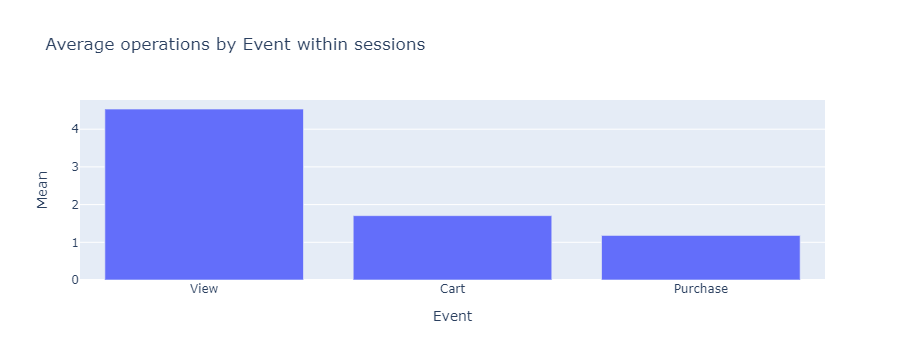

In [29]:
# Get unique combination per session and event_type
all_funn = pd.DataFrame(df.groupby(['user_session', 'event_type']).event_type.count()).rename(columns={'event_type':'count'}).reset_index()
gc.collect()

# Count the funnels combination per session
mean_view = all_funn[all_funn['event_type'] == 'view'][['count']].mean()
mean_cart = all_funn[all_funn['event_type'] == 'cart'][['count']].mean()
mean_purchase = all_funn[all_funn['event_type'] == 'purchase'][['count']].mean()

df_plot = {'Event': ['View', 'Cart', 'Purchase']
           ,'Mean': [mean_view[0],mean_cart[0],mean_purchase[0]]
           }
df_plot = pd.DataFrame(df_plot, columns = ['Event','Mean'])

fig = px.bar(df_plot, x='Event', y='Mean', width=800, height=300,  title="Average operations by Event within sessions")
fig.show()

del all_funn

From the previous chart, we conclude that operation users repeat more on average within a session is **View** with a value of 4.5. On the other hand, Cart and Purchase have almost the same mean, explaining that they occur in almost the same proportion.

## How many times, on average, a user views a product before adding it to the cart?